<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/litneet64/Lab-7/litneet64_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and Learning**
**Pablo Aravena**

# **Abstract**

 In this report we are tasked with the implementation of optimization methods.

# **About the code**

In [0]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Pablo Aravena (pjan2@kth.se)

# Based on the template by Johan Hoffman (jhoffman@kth.se)
# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

 In the next section we implement the $\textit{Gradient Descent}$ method, used to get a minima of a mulitvariate function, a method that holds a lot of importance, as the general topic of optimization remains as a $\textit{"backbone"}$ for $ML$, $DL$ and such.

# **Methods**

#### Gradient Descent
A backtracking line search algorithm was used for the `get_step_length` method, following the advice seen on $\href{https://math.stackexchange.com/questions/373868/optimal-step-size-in-gradient-descent}{\text{math stack exchange}}$, where a certain condition called the $\textit{armijo-goldstein}$ condition was used as a stopping criteria. It basically saves us extra computations by just checking if $\alpha$ is good enough instead of trying to find the best one at each iteration (another problem on itself). It's given as:

\begin{equation*}
    \frac{\Delta y}{\Delta x} = \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
\end{equation*}

The `compute_gradient` method follows another advice found on $\href{https://stackoverflow.com/questions/16078818/calculating-gradient-with-numpy#16082040}{stack overflow}$ about getting the gradient for a function with the centered difference quotient:

\begin{equation*}
    F(x_i + \alpha \cdot \upsilon) \leq F(x_i) - c \cdot \alpha \cdot ||\nabla F(x_i)||
\end{equation*}

Where $x_i$ is the current point, $c$ is a defined constant and $\upsilon = -\nabla F(x_i)$

Then, the `gradientDescent` method used these other functions as seen on $Algorithm$ $15.1$ on the lecture notes.

In [0]:
# auxiliary function to calculate the step length following a backtracking line search
def get_step_length(f, Df, x):
    # get random value for initial candidate for alpha in [0, 1]
    alpha = rd.random()
    
    # define c as 0.3, t and v
    c = 0.3
    t = - c * np.linalg.norm(Df)
    v = -1 * Df
    
    # iter counter and limit
    j = 0
    iter_limit = 1000
    
    
    # while the armijo-goldstein condition isn't met or the limit of iterations hasn't been reached
    while f(x) - f(x + alpha * v) > alpha * t and j < iter_limit:
        # decrease alpha by t
        alpha = alpha * t
        j += 1
        
    return alpha
  
# auxiliary function to calculate the gradient for a function as seen on
# https://stackoverflow.com/questions/16078818/calculating-gradient-with-numpy#16082040
def compute_gradient(f, x):
    h = 1e-09
    cent_diff = (f(x + h) - f(x - h)) / 2*h
    
    return np.array([cent_diff for i in range(len(x))])


def gradientDescent(func, n):
    # initial guess and compute the gradient
    x = np.random.random(n)
    Df = compute_gradient(func, x)
    
    while np.linalg.norm(Df) > 1e-09:
        Df = compute_gradient(func, x)
        alpha = get_step_length(func, Df, x)
        
        # update x vector
        x -= alpha * Df
    
    # return min
    return x
    

#### Tester Method

To visually test the accuracy we used the function $f(x, y) = x^2 + y^2 + 5$. For the accuracy we used a grid made out of $100x100$ points between $-10$ and $10$ (both on the $X$ axis as on the $Y$ axis).

In [0]:
def show3DPlot():
    # test function
    func = lambda vect: vect[0]**2 + vect[1]**2 + 5
    
    # plot points (get reshaped as we need 2D vector arrays)
    x = y = np.linspace(-10, 10, 100)
    x, y = np.meshgrid(x, y)
    
    # create the 3d plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # get the approximated optimals for that function using gradient descent
    our_optim = gradientDescent(func, 2)
    
    # add our optimal to the plot
    ax.scatter(our_optim[0], our_optim[1], func(our_optim), color = 'r', s = 250)
    
    # get f(x, y) points and reshape it into a 2D array
    z = np.array(list(map(func, zip(x, y))))
    z = z.reshape(x.shape)
    
    # setup size of figure (width, height)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    
    # add surface to the plot and plot both figures
    ax.set_title("f(x, y) = x^2 + y^2 + 5", fontsize = 25)
    ax.plot_surface(x, y, z, alpha = 0.4)
    


# **Results**

Here we are plotting our minima found alongside the plotted surface.

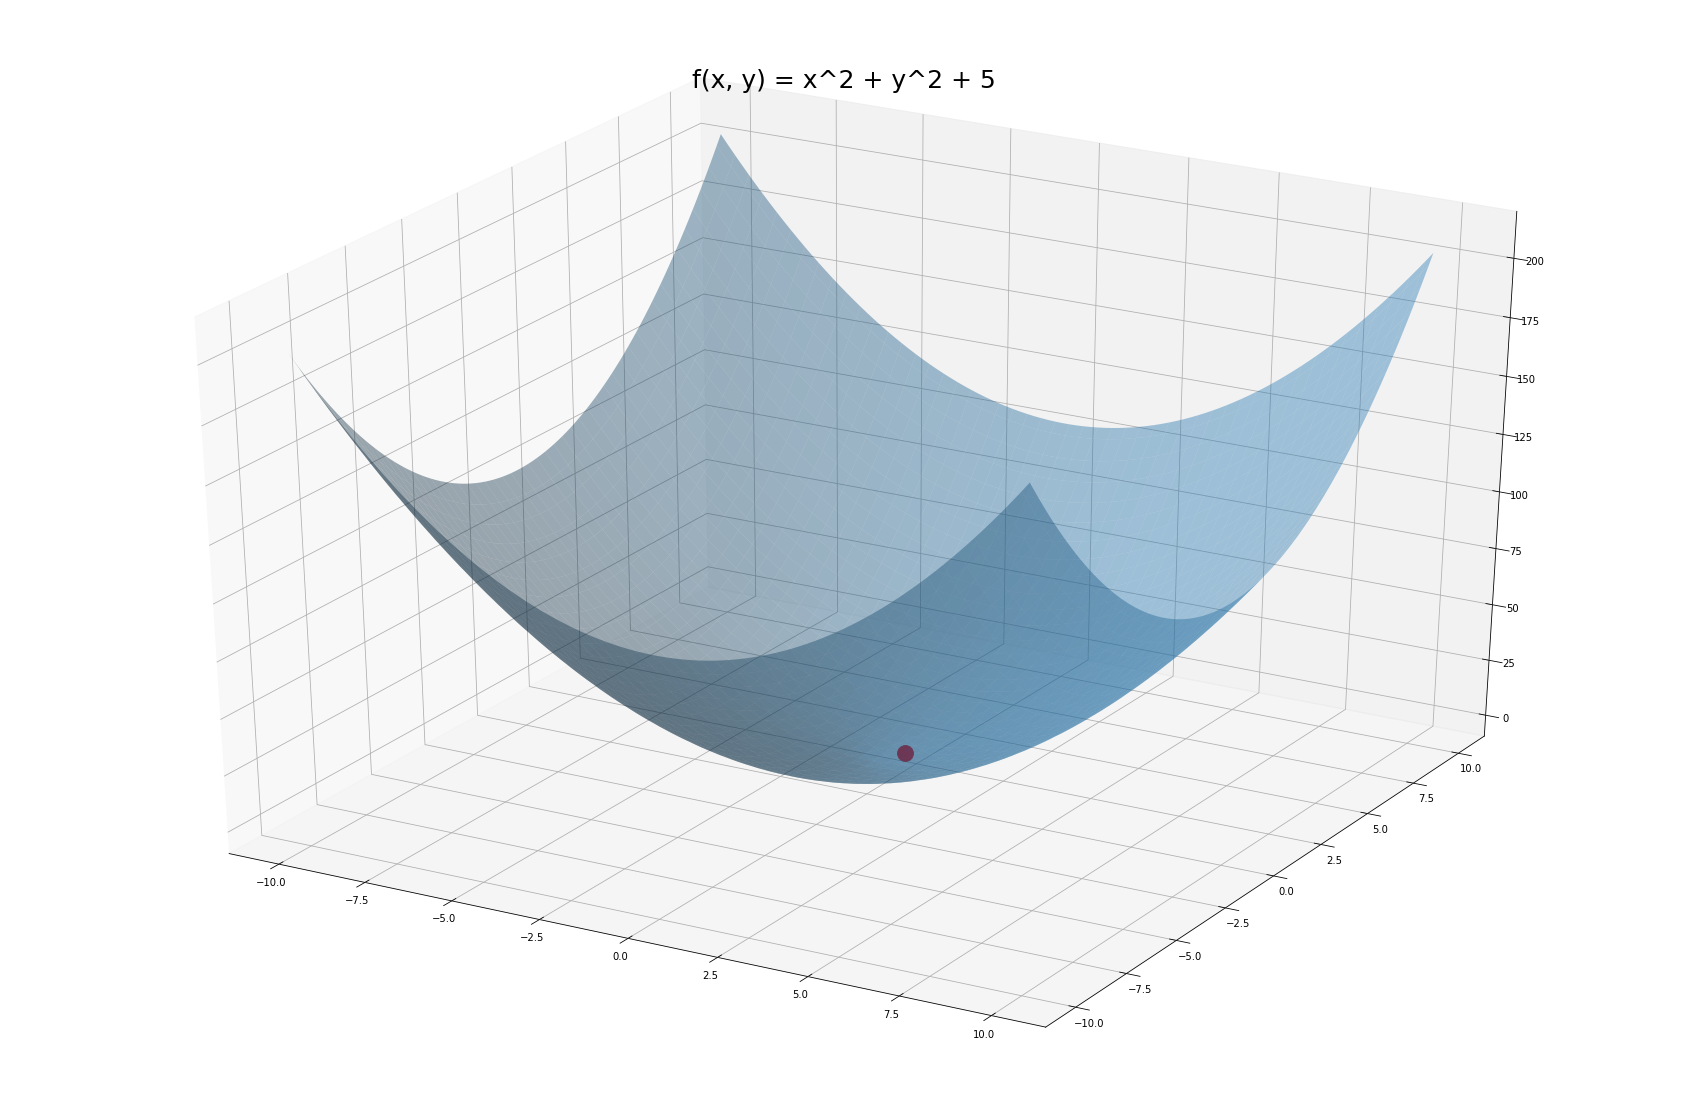

In [6]:
show3DPlot()

# **Discussion**

 Implementing the Gradient Descent algorithm was not difficult at all. The details that made it up were the most interesting ones, like finding a good $\alpha$ or $\textit{learning rate}$ at every iteration, along with finding a good way to get the gradient of the multivariate function on a specified point.